In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gan import gan as GAN
import seaborn as sns
from tqdm import tqdm

In [43]:
exp_iter = 10
dims = [10, 25, 50, 75, 100]
size = [50, 100, 200, 500, 1000]
result_gd = np.zeros([len(size), exp_iter])
for j, n in enumerate(size):
    for i in range(exp_iter):
        gan = GAN(50, 0.1)
        gan.dist_init('mu', 0, 5)
        gan.data_init(n, 3)
        gan.model_init()
        gan.optimizer_init(0.5, 0.5, 0.95, 1e-5, 3e-5, 1, 1, False, 0.1)
        gan.fit(3000, 1e-7, True)
        result_gd[j, i] = gan.score(10)
        

100%|██████████| 3000/3000 [00:58<00:00, 51.16it/s]


In [44]:
result_gd

array([[1.27554182, 1.10258629, 1.24291043, 1.25209123, 1.31230361,
        1.6445368 , 1.10386789, 1.84719525, 1.58368772, 1.54911579],
       [0.84579354, 1.02728261, 0.86607363, 0.90090305, 1.05362402,
        0.80976343, 1.22355975, 0.97495212, 0.84516855, 1.05894982],
       [0.77190299, 0.79765058, 0.66738004, 0.75870517, 0.72636128,
        0.89690508, 0.58763565, 0.66806356, 0.68367943, 0.6203043 ],
       [0.5450617 , 0.4434345 , 0.47712206, 0.43385956, 0.4683073 ,
        0.40583367, 0.33497954, 0.43722867, 0.44509764, 0.42885839],
       [0.36650277, 0.28434221, 0.37049024, 0.41915693, 0.42463495,
        0.30772609, 0.43154261, 0.32795881, 0.33269507, 0.46034379]])

In [45]:
mean_gd, std_gd = np.mean(result_gd, axis=1), np.std(result_gd, axis=1)

In [46]:
mean_gd, std_gd

(array([1.39138368, 0.96060705, 0.71785881, 0.4419783 , 0.37253935]),
 array([0.23683325, 0.12404923, 0.08703829, 0.05057876, 0.05627902]))

In [16]:
exp_iter = 10
dims = [10, 25, 50, 75, 100]
result_100 = np.zeros([exp_iter])
for i in range(exp_iter):
    gan = GAN(100, 0.1)
    gan.dist_init('mu', 0, 5)
    gan.data_init(1000, 3)
    gan.model_init()
    gan.optimizer_init(1, 1.5, 0.8, 1e-5, 3e-5, 1, 1, True, 0.1)
    gan.fit(100, 1e-7, True)
    result_100[i] = gan.score(10)

100%|██████████| 100/100 [01:13<00:00,  1.37it/s]


In [19]:
np.std(result_100), np.mean(result_100)

(0.20133719056016153, 0.8452187262673426)

In [10]:
result

array([[0.09284239, 0.14186942, 0.15490787, 0.13224802, 0.27039015,
        0.19424239, 0.17925195, 0.14344824, 0.10720997, 0.17011322],
       [0.21514431, 0.20728155, 0.22348905, 0.23657232, 0.13942462,
        0.25935668, 0.23584933, 0.23619975, 0.24854009, 0.20929594],
       [0.35512064, 0.35251314, 0.35084726, 0.32573541, 0.32740832,
        0.59895927, 0.38876469, 0.3721108 , 0.35810087, 0.38638296],
       [0.54085904, 0.60082841, 0.56521111, 0.61141233, 0.42628225,
        0.61090029, 0.43076568, 0.62384157, 0.86741448, 0.4765932 ],
       [0.73136397, 0.63964332, 0.85372156, 0.87644097, 0.98403274,
        0.83949086, 1.21834258, 0.83321573, 0.64916756, 1.06127829]])

<ErrorbarContainer object of 3 artists>

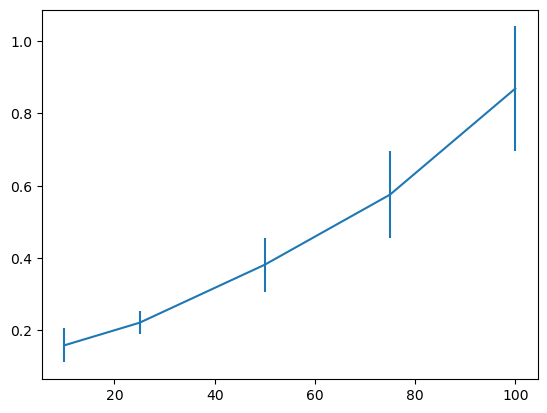

In [11]:
sd = np.std(result, axis=1)
mean = np.mean(result, axis=1)
plt.errorbar(dims, mean, sd)

In [15]:
mean, sd

(array([0.15865236, 0.22111536, 0.38159434, 0.57541084, 0.86866976]),
 array([0.04744364, 0.03153379, 0.07517449, 0.12043159, 0.17162668]))

In [20]:
sd[-1] = 0.20133719056016153
mean[-1] = 0.8452187262673426

In [12]:
# median
exp_iter = 10
dims = [10, 25, 50, 75, 100]
result = np.zeros([len(dims), exp_iter])
for j, p in enumerate(dims):
    for i in range(10):
        gan = GAN(p, 0.1)
        gan.dist_init('mu', 0, 5)
        gan.data_init(1000, 3)
        gan.model_init()
        gan.optimizer_init(0.02 * gan.data_dim, 0.95, 1e-5, 1e-5, 5, 1, True, 0.1)
        gan.fit(1, 1e-7, verbose=False)
        result[j, i] = gan.l2_loss[0]

<ErrorbarContainer object of 3 artists>

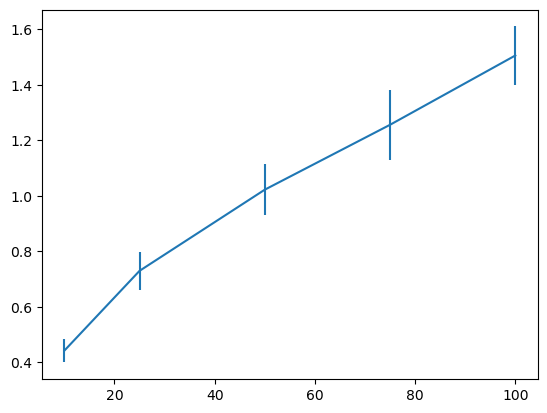

In [13]:
sd = np.std(result, axis=1)
mean = np.mean(result, axis=1)
plt.errorbar(dims, mean, sd)

# 要素ごとの中央値

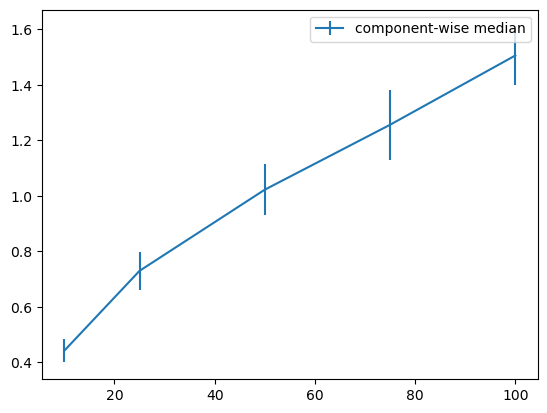

In [19]:
mean_cm, sd_cm = np.array([0.44239473, 0.72967008, 1.02204266, 1.25574672, 1.50527871]), np.array([0.04279821, 0.06932521, 0.09155913, 0.12511502, 0.1045442 ])
plt.errorbar(dims, mean, sd, label='component-wise median')
plt.legend()

In [25]:
mean_stv, std_stv

(array([0.15865236, 0.22111536, 0.38159434, 0.57541084, 0.84521873]),
 array([0.04744364, 0.03153379, 0.07517449, 0.12043159, 0.20133719]))

# 次元を変化させた場合

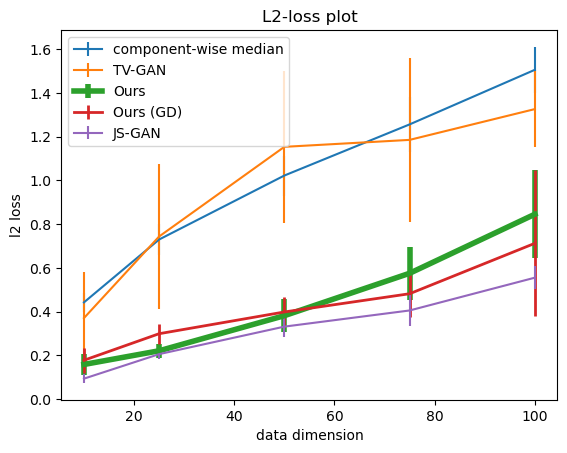

In [42]:
mean_js = [0.0938 , 0.2058 ,0.3316 ,0.4054, 0.5553]
std_js = [0.0195, 0.0218, 0.0462, 0.0690, 0.0518]
mean_tv = [0.3707,0.7434,1.1532, 1.1850, 1.3257]
std_tv = [0.2102,0.3313,0.3488,0.3739,0.1721]
mean_cm, sd_cm = np.array([0.44239473, 0.72967008, 1.02204266, 1.25574672, 1.50527871]), np.array([0.04279821, 0.06932521, 0.09155913, 0.12511502, 0.1045442 ])
mean_stv, std_stv = np.array([0.15865236, 0.22111536, 0.38159434, 0.57541084, 0.84521873]), np.array([0.04744364, 0.03153379, 0.07517449, 0.12043159, 0.20133719])
mean_gd, std_gd = np.array([0.17782805, 0.29920686, 0.39857085, 0.4818977 , 0.71230861]), np.array([0.05671325, 0.04486162, 0.07017128, 0.10532217, 0.33341036])
plt.errorbar(dims, mean_cm, sd_cm, label='component-wise median')
plt.errorbar(dims, mean_tv, std_tv, label='TV-GAN')
plt.errorbar(dims, mean_stv, std_stv, label='Ours', lw=4)
plt.errorbar(dims, mean_gd, std_gd, label='Ours (GD)', lw=2)
plt.errorbar(dims, mean_js, std_js, label='JS-GAN')
plt.title('L2-loss plot')
plt.xlabel('data dimension')
plt.ylabel('l2 loss')
plt.legend()

# サンプル数を変化させた場合

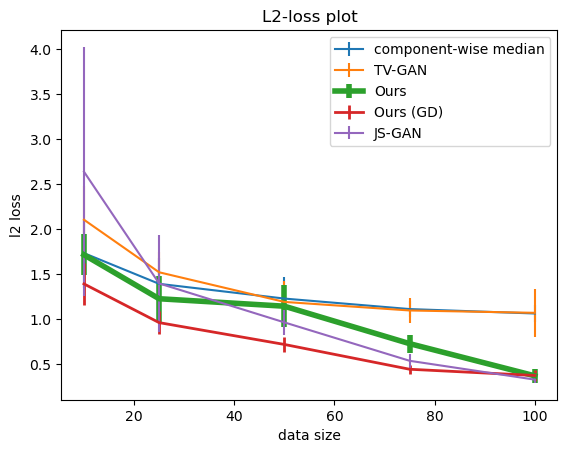

In [47]:
mean_js = [2.6392,1.3966, 0.9633 ,0.5360, 0.3265]
std_js =  [1.3877,0.5370,0.1383,0.0808,0.0336]
mean_tv = [2.1050,1.5205, 1.1909, 1.0957, 1.0695]
std_tv = [0.3763,0.2221,0.2273,0.1390,0.2639]
mean_cm= np.array([1.7335, 1.3921 ,1.2281 ,1.1113, 1.0620]) 
sd_cm = np.array([0.3848,0.2862,0.2435,0.0864,0.0962]) 

mean_stv = np.array([1.7149, 1.2262, 1.1433, 0.7267, 0.3685])
std_stv = np.array([0.2295,0.2579,0.2313,0.0997,0.0786])
mean_gd = np.array([1.39138368, 0.96060705, 0.71785881, 0.4419783 , 0.37253935])
std_gd = np.array([0.23683325, 0.12404923, 0.08703829, 0.05057876, 0.05627902])
plt.errorbar(dims, mean_cm, sd_cm, label='component-wise median')
plt.errorbar(dims, mean_tv, std_tv, label='TV-GAN')
plt.errorbar(dims, mean_stv, std_stv, label='Ours', lw=4)
plt.errorbar(dims, mean_gd, std_gd, label='Ours (GD)', lw=2)
plt.errorbar(dims, mean_js, std_js, label='JS-GAN')
plt.title('L2-loss plot')
plt.xlabel('data size')
plt.ylabel('l2 loss')
plt.legend()